In [3]:
import pandas as pd
import dash
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import plotly.express as px

In [4]:
engine=create_engine("sqlite:///"+r"C:\Users\19193\Documents\BootCamp\Is_Starbucks_your_cup_of_coffee\Starbucks.sqlite")
conn=engine.connect()

In [5]:
result=pd.read_csv(r"C:\Users\19193\Documents\BootCamp\Is_Starbucks_your_cup_of_coffee\profile.csv")
result

,gender,age,income
0,NaN,118,NaN
1,F,55,112000.0
2,NaN,118,NaN
3,F,75,100000.0
4,NaN,118,NaN
...,...,...,...
16995,F,45,54000.0
16996,M,61,72000.0
16997,M,49,73000.0
16998,F,83,50000.0


In [4]:
result.dtypes
result['income'].isnull().sum()
result['gender'].isnull().sum()

2175

In [6]:
#drop null records where age=118 
result.drop(result[result.age==118].index, inplace=True)
result.describe()

,age,income
count,14825.000000,14825.000000
mean,54.393524,65404.991568
std,17.383705,21598.299410
min,18.000000,30000.000000
25%,42.000000,49000.000000
50%,55.000000,64000.000000
75%,66.000000,80000.000000
max,101.000000,120000.000000


In [7]:
#create another variable and code F,M , O
result['sex']=result['gender'].replace(['F','M','O'],['Female','Male','Oblivious'])

In [16]:
result=result.drop_duplicates()
result

,gender,age,income,sex
1,F,55,112000.0,Female
3,F,75,100000.0,Female
5,M,68,70000.0,Male
8,M,65,53000.0,Male
12,M,58,51000.0,Male
...,...,...,...,...
16950,F,26,65000.0,Female
16968,M,74,87000.0,Male
16973,M,30,57000.0,Male
16986,F,59,63000.0,Female


In [7]:
#% of sex
gender_count=(result['sex'].value_counts())
# gender_count *=100/gender_count.sum()
gender_count

Male         3796
Female       3446
Oblivious     207
Name: sex, dtype: int64

In [17]:
# sns.countplot(result['gender'])
result.head()

df_sa=result[result.['sex', 'age', 'income']].groupby(['sex', 'age']).agg(['count'])
df_sa
for col in df_sa.columns:
    print(col)
# px.histogram(result,  color="gender")
# px.histogram(result,  color="gender")
# # px.histogram(result_sex,  barmode='group')
# fig = px.pie(df, name='sex' ,title='Percentage of consumer on basis of gender')
# fig.show()

# df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
# df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
# fig = px.pie(df, values='pop', names='country', title='Population of European continent')
# fig.show()
# df = px.result_sa()
# fig = px.pie(df, values='tip', names='day')
# fig.show()

# import plotly.express as px
# long_df =.sex_long()
# long_df
# # fig = px.pie(result_sa, values='age', names='sex')
# # fig.show()

SyntaxError: invalid syntax (<ipython-input-17-c73cca66eac7>, line 4)

In [26]:
results = result[['age','sex','income']].groupby(['age', 'sex']).count()
results
list(results.columns)

['income']

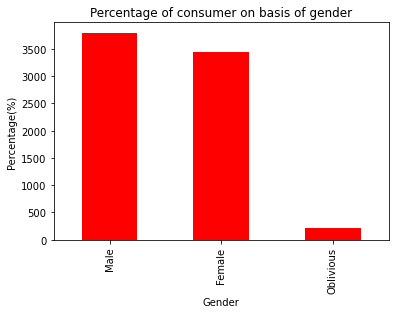

In [10]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
gender_count.plot(kind="bar", facecolor="red")
plt.title("Percentage of consumer on basis of gender")
plt.ylabel("Percentage(%)")
plt.xlabel("Gender")
plt.show()

In [7]:
# plt.figure(figsize=[5, 5])
# pievalues = gender_count
# piecolors = ['blue', 'orange', 'green']
# pielabels = ['Female','Male','Oblivious']
# plt.pie(pievalues, colors=piecolors, labels=pielabels,  autopct='%1.2f%%', counterclock=False, shadow=True)
# plt.title('Percentage of consumer on basis of gender')
# plt.legend()


fig = px.pie(gender_count, names='sex' ,title='Percentage of consumer on basis of gender')
fig.show()


NameError: name 'gender_count' is not defined

In [17]:
#find the ranges from above look at min /max value for age and income
pd.interval_range(start=18, freq=10, end=108, closed='left')
pd.interval_range(start=30000, freq=15000, end=120000, closed='left')


IntervalIndex([[30000, 45000), [45000, 60000), [60000, 75000), [75000, 90000), [90000, 105000), [105000, 120000)],
              closed='left',
              dtype='interval[int64]')

In [18]:
#create a range for ages
bins = [18, 30, 40, 50, 60, 70, 80, 90, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-90','90+'] 
result['age_range'] = pd.cut(result.age, bins, labels = labels,include_lowest = True)
    

<ipython-input-18-5c5b6e93c4d1>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
# percentage of age_range
age_range_percentage = result['age_range'].value_counts()/len(result['age_range'])*100 # calculates the percentages of all age ranges
age_range_percentage

50-59    20.284602
60-69    18.123238
40-49    15.169821
70-79    13.639415
18-29    11.464626
30-39    10.847094
80-90     7.853403
90+       2.617801
Name: age_range, dtype: float64

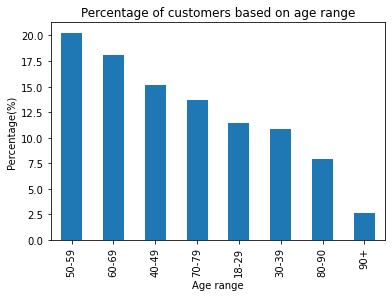

In [46]:
age_range_percentage.plot(kind="bar")
plt.title("Percentage of customers based on age range")
plt.ylabel("Percentage(%)")
plt.xlabel("Age range")
plt.show()


In [20]:
#create range for income
bin_i=[30000, 45000, 60000, 75000, 90000, 105000, 140000]
labels_i=['30000-44999', '45000-59999', '60000-74999', '75000-89999','90000-104999','120000+']
result['income_range'] = pd.cut(result.income, bins=bin_i, labels = labels_i,include_lowest = True) 

<ipython-input-20-e991f19f6a8a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
result.head()

,gender,age,income,sex,age_range,income_range
1,F,55,112000.0,Female,50-59,120000+
3,F,75,100000.0,Female,70-79,90000-104999
5,M,68,70000.0,Male,60-69,60000-74999
8,M,65,53000.0,Male,60-69,45000-59999
12,M,58,51000.0,Male,50-59,45000-59999


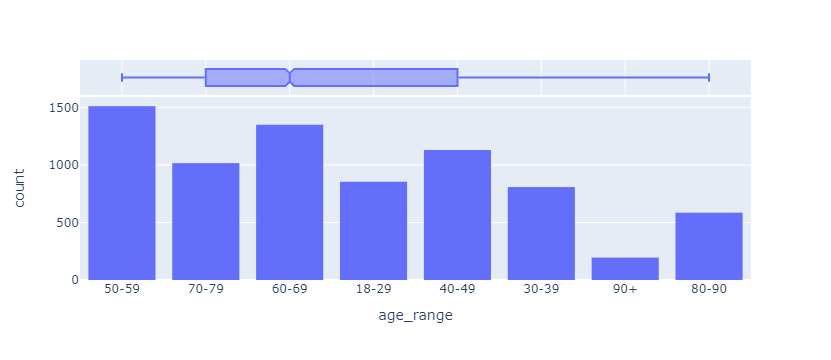

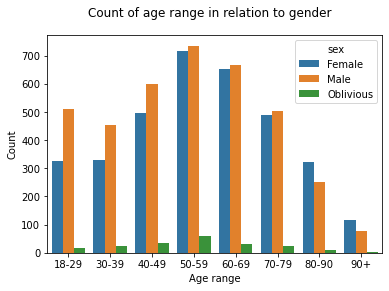

In [21]:
# countplot plots the count of the number of records by category
cnt = sns.countplot(x="age_range", hue="sex", data=result) # plots a bar chart 
cnt.set(xlabel= "Age range", ylabel= "Count") # labels axis
plt.suptitle("Count of age range in relation to gender"); # title of plot

fig = px.histogram(result, x='age_range', nbins=10, marginal='box')
fig.show()


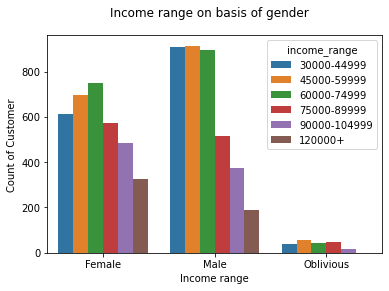

In [49]:
# countplot plots the count of the number of records by category
cnt = sns.countplot(x="sex", hue="income_range", data=result) # plots a bar chart 
cnt.set(xlabel= "Income range", ylabel= "Count of Consumption") # labels axis
plt.suptitle("Income range/Count on basis of gender"); # title of plot
